In [1]:
BEIJING, CHANGCHUN, ULUMUQI, SICHUAN, GUANGZHOU, SHENZHEN, SHANGHAI, NEWYORK, WUHAN, BANGKOK = """
BEIJING CHANGCHUN ULUMUQI SICHUAN GUANGZHOU SHENZHEN SHANGHAI NEWYORK WUHAN BANGKOK
""".split()

In [2]:
dictionary = {}

In [3]:
connection = {
    CHANGCHUN: [BEIJING],
    ULUMUQI: [BEIJING], 
    BEIJING: [ULUMUQI, CHANGCHUN, WUHAN, SHENZHEN, NEWYORK],
    NEWYORK: [BEIJING, SHANGHAI],
    SHANGHAI: [NEWYORK, WUHAN],
    WUHAN: [SHANGHAI, BEIJING, GUANGZHOU],
    GUANGZHOU: [WUHAN, BANGKOK],
    SHENZHEN: [WUHAN, BANGKOK],
    BANGKOK: [SHENZHEN, GUANGZHOU]
}

In [4]:
import networkx as nx

In [5]:
%matplotlib inline

In [6]:
graph = connection

In [7]:
g = nx.Graph(graph)

C:\Users\Xraigor\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


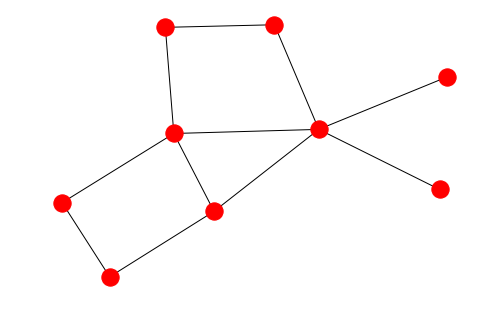

In [8]:
nx.draw(g)

In [9]:
def nagivator(start, destination, connection_graph):
    pathes = [[start] ]
    seen = set()
    
    while pathes:
        path = pathes.pop(0)
        froniter = path[-1]
        
        if froniter in seen: continue
            
        successors = connection_graph[froniter]
        
        for s in successors: 
            if s == destination: 
                path.append(s)
                return path
            else:
                pathes.append(path + [s])  
                
        pathes = sorted(pathes, key=len) # 最小换成
                
        seen.add(froniter)

In [10]:
def nagivator_bfs(start, destination, connection_graph):
    pathes = [start ]
    seen = set()
    
    while pathes:
        froniter = pathes.pop(0)
        
        if froniter in seen: continue
            
        successors = connection_graph[froniter]
        print('standing on {} Looking forward {}'.format(froniter, successors))
        pathes = pathes + successors
                
        seen.add(froniter)

In [11]:
connection_2 = {
    0: [1, 5], 
    1: [0, 2], 
    2: [1, 3], 
    3: [2, 4], 
    4: [3],
    5: [0, 6], 
    6: [5, 7],
    7: [6]
}

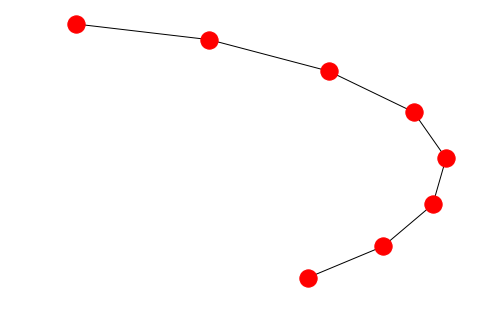

In [12]:
nx.draw(nx.Graph(connection_2))

In [13]:
nagivator_bfs(0, 7, connection_2)

standing on 0 Looking forward [1, 5]
standing on 1 Looking forward [0, 2]
standing on 5 Looking forward [0, 6]
standing on 2 Looking forward [1, 3]
standing on 6 Looking forward [5, 7]
standing on 3 Looking forward [2, 4]
standing on 7 Looking forward [6]
standing on 4 Looking forward [3]


In [14]:
def draw_route(routes):
    print("= ->".join(routes))

In [15]:
draw_route(nagivator(CHANGCHUN, BANGKOK, connection))

CHANGCHUN= ->BEIJING= ->SHENZHEN= ->BANGKOK


In [16]:
nagivator(CHANGCHUN, BANGKOK, connection)

['CHANGCHUN', 'BEIJING', 'SHENZHEN', 'BANGKOK']

In [17]:
## Sentence GENERATION
grammer = """
stmt = if block else block
block = cmp; assignment
assignment = XXX
XXX
"""

In [18]:
decimal_grammer = """
expression = operator op operator
operator = num op num
num = 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 num num
op = + | - | / 
"""

In [19]:
grammer = """
sentence => noun_phrase verb_phrase 
noun_phrase => Article Adj* noun
Adj* => null | Adj Adj*
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun =>   女人 |  篮球 | 桌子 | 小猫
verb => 看着   |  坐在 |  听着 | 看见
Adj =>   蓝色的 |  好看的 | 小小的
"""


In [20]:
import random

In [21]:
def parse_grammar(grammar_str, sep='=>'):
    grammar = {}
    for line in grammar_str.split('\n'): 
        line = line.strip()
        if not line: continue
        
        target, rules = line.split(sep)
        
        grammar[target.strip()] = [r.split() for r in rules.split('|')]
    
    return grammar

In [25]:
g = parse_grammar(grammer)

In [26]:
g

{'sentence': [['noun_phrase', 'verb_phrase']],
 'noun_phrase': [['Article', 'Adj*', 'noun']],
 'Adj*': [['null'], ['Adj', 'Adj*']],
 'verb_phrase': [['verb', 'noun_phrase']],
 'Article': [['一个'], ['这个']],
 'noun': [['女人'], ['篮球'], ['桌子'], ['小猫']],
 'verb': [['看着'], ['坐在'], ['听着'], ['看见']],
 'Adj': [['蓝色的'], ['好看的'], ['小小的']]}

In [30]:
def generate(grammer_parsed, target = "sentence"):
    if target not in grammer_parsed: return target
    rules = random.choice(grammer_parsed[target])
    
    return "".join(gene(grammer_parsed, target = r) for r in rules if r != "null")

In [37]:
## generate("verb_phrase") = generate("verb") + generate("noun_phrase")
## generate("noun") = random.choice("女人 |  篮球 | 桌子 | 小猫")
g['sentence']

[['noun_phrase', 'verb_phrase']]

In [38]:
generate(g)

'这个篮球看见这个蓝色的好看的蓝色的小小的篮球'

In [34]:
print(gene(parse_grammar(decimal_grammer,sep = "="), target = "expression"))

5+7-5-5


In [35]:
for i in range(20):
    print(gene(parse_grammar(decimal_grammer, sep='='), target='expression'))

7/901+5/7
8-8+0+0
8-8+6/2
2/6+5/3
7+978/984+3
0-5/0/980
930-4/0-7
8-8-8+4
0-1+5/4
0-0-0/957
6/5/2-1
5-1/1-7
4+931+8/7
4/948/3+6
8/0-4+96987
969949880+3-7/6
1/2/4/8
7/7/1-8
4+947+93952+5
5-956+5-6
